In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [196]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


###Data Preprocessing

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [198]:
data.nunique()

id       7920
label       2
tweet    7918
dtype: int64

In [199]:
data.duplicated().sum()

0

In [200]:
!pip install nltk

##Text Preprocessing

In [201]:
import re #regular expressions
import string
import nltk

In [202]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

###Convert uppercase to lowercase

In [203]:
def lower_case(text):
    text = text.lower()
    return text
data['tweet'] = data['tweet'].apply(lower_case)
#data['tweet'] = data['tweet'].apply(lambda x: " ". join(x.lower() for x in x.split()))

In [204]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

###Remove hyperlinks

In [205]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https://.*[\r\n]*', '', x, flags = re.MULTILINE) for x in x.split()))

In [206]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

###Remove punctuations

In [207]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [209]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

###Remove Numbers

In [210]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app httpb...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [211]:
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex = True)

In [212]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

###Remove Stopwords

In [213]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [214]:
with open ('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [215]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [216]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

###Stemming

In [217]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [218]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [219]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

##Building Vocabulary

In [220]:
from collections import Counter
vocab = Counter()

In [221]:
for sentence in data['tweet']:
    vocab.update(sentence.split())
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [222]:
len(vocab)

19066

In [223]:
data.shape

(7920, 3)

In [224]:
tokens = [key for key in vocab if vocab[key] > 10]

In [225]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [226]:
len(tokens)

1152

###We can see if the above is overfitting during the training and testing phase

In [227]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

###Training Testing data split

In [228]:
X = data['tweet']
y = data['label']

In [229]:
X.head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [230]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [231]:
!pip install scikit-learn

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [234]:
X_train

7372    today’ highlight new airpod come home cake the...
6780    new headphon soni goodmus whiteheadphon bimbof...
1257    new iphon case guerlain new iphon case iphon p...
7862    u appl haven’t notic updat suck cock get wors ...
4897    face dad gave card worth £ gay shop boy macboo...
                              ...                        
465     appar pain hour go say io appl staytun pictwit...
6493    mac back replac logic board batteri fan heat s...
3971    trillazzbunni followsunday followback rt teamf...
3644    birthday iphoneat tonight rule chicago concert...
7187                    half hour tri reset password lock
Name: tweet, Length: 7128, dtype: object

In [235]:
X_test

6806    cant resist grow cake beard soni cake cream yu...
5754    gain follow rt must follow follow back follow ...
5218    two iphon app made realiz love life suck httpt...
4088    worst game ever app game suck appl game fact k...
1682    mubarakua go order ready󾌳 samsung custommad co...
                              ...                        
1306    gain follow rt must follow follow back follow ...
7235    got iphon five phone outterbox purpl excit iph...
4584    tbt beauti day sight make awesomeshot awesom a...
3388    sinc reluctantli move android iphon discov app...
3984    know im plan buy iphonex anytim soon im iphone...
Name: tweet, Length: 792, dtype: object

###Vectorization

In [236]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype = np.float32)

    return vectorized_list_new

In [237]:
vectorized_X_train = vectorizer(X_train, tokens)
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [238]:
vectorized_X_test = vectorizer(X_test, tokens)
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [239]:
vectorized_X_test.shape

(792, 1152)

In [240]:
vectorized_X_train.shape

(7128, 1152)

In [241]:
y_train.value_counts()

label
0    5290
1    1838
Name: count, dtype: int64

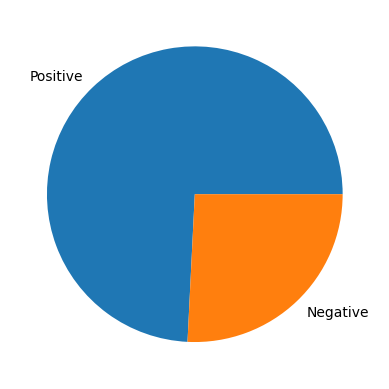

In [242]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

In [243]:
!pip install imbalanced-learn

In [244]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(10580, 1152) (10580,)


In [245]:
y_train_smote.value_counts()

label
0    5290
1    5290
Name: count, dtype: int64

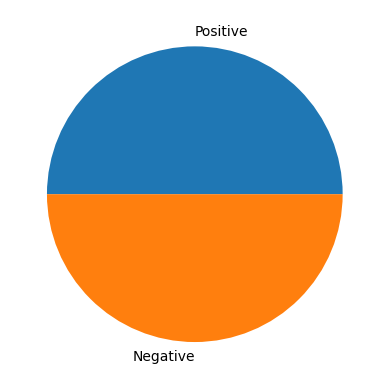

In [246]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

###Model Training and Evaluation

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [248]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training scores:\nAccuracy = {acc}\nPrecision = {pre}\nRecall = {rec}\nf1 score = {f1}\n')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing scores:\nAccuracy = {acc}\nPrecision = {pre}\nRecall = {rec}\nf1 score = {f1}\n')

###Logistic Regression

In [249]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = lr.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 0.936
Precision = 0.911
Recall = 0.967
f1 score = 0.938

Testing scores:
Accuracy = 0.874
Precision = 0.688
Recall = 0.856
f1 score = 0.763



###Naive Bayes

In [250]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = mnb.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 0.905
Precision = 0.869
Recall = 0.953
f1 score = 0.909

Testing scores:
Accuracy = 0.861
Precision = 0.643
Recall = 0.931
f1 score = 0.761



###Decision Tree Classifier

In [251]:
dtc = DecisionTreeClassifier()
dtc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = dtc.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = dtc.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
f1 score = 1.0

Testing scores:
Accuracy = 0.847
Precision = 0.683
Recall = 0.665
f1 score = 0.674



###Random Forest Classifier

In [252]:
rfc = RandomForestClassifier()
rfc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = rfc.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = rfc.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
f1 score = 1.0

Testing scores:
Accuracy = 0.875
Precision = 0.743
Recall = 0.723
f1 score = 0.733



###Support Vector Classifier

In [253]:
svc = SVC()
svc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = svc.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = svc.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 0.977
Precision = 0.959
Recall = 0.996
f1 score = 0.978

Testing scores:
Accuracy = 0.881
Precision = 0.724
Recall = 0.809
f1 score = 0.764



###Save the model

In [255]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(svc, file)